## Introduction

You are owing a supermarket mall and through membership cards, you have some basic data about your customers like Customer ID, age, gender, annual income and spending score. You want to understand the customers like who are the target customers so that the sense can be given to marketing team and plan the strategy accordingly.

## Loading packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
from matplotlib import pyplot as plt

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

## Loading dataset

In [2]:
data = pd.read_csv('/content/drive/MyDrive/DS Course Uploads/Datasets/Customers.csv')

In [3]:
data_all = pd.read_csv('/content/drive/MyDrive/DS Course Uploads/Datasets/Customers.csv')

## Describing data

In [4]:
data

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6
...,...,...,...,...,...,...,...,...
1995,1996,Female,71,184387,40,Artist,8,7
1996,1997,Female,91,73158,32,Doctor,7,7
1997,1998,Male,87,90961,14,Healthcare,9,2
1998,1999,Male,77,182109,4,Executive,7,2


In [46]:
data.Profession.value_counts()

AttributeError: 'DataFrame' object has no attribute 'Profession'

## Performing EDA

In [6]:
data.drop(['CustomerID', 'Profession'], axis=1, inplace=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  2000 non-null   object
 1   Age                     2000 non-null   int64 
 2   Annual Income ($)       2000 non-null   int64 
 3   Spending Score (1-100)  2000 non-null   int64 
 4   Work Experience         2000 non-null   int64 
 5   Family Size             2000 non-null   int64 
dtypes: int64(5), object(1)
memory usage: 93.9+ KB


In [8]:
data_g = data.copy()

In [9]:
# data.drop('Gender', axis=1, inplace=True)
data.Gender = data.Gender.map({"Male": 0, "Female": 1})

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Gender                  2000 non-null   int64
 1   Age                     2000 non-null   int64
 2   Annual Income ($)       2000 non-null   int64
 3   Spending Score (1-100)  2000 non-null   int64
 4   Work Experience         2000 non-null   int64
 5   Family Size             2000 non-null   int64
dtypes: int64(6)
memory usage: 93.9 KB


In [11]:
data.isnull().any()

Gender                    False
Age                       False
Annual Income ($)         False
Spending Score (1-100)    False
Work Experience           False
Family Size               False
dtype: bool

In [12]:
data.duplicated().any()

False

In [13]:
data.rename({'Annual Income ($)': 'Income', 'Spending Score (1-100)': 'Spend', 'Work Experience': 'Work_exp', 'Family Size': 'Family'}, axis=1, inplace=True)
data_all.rename({'Annual Income ($)': 'Income', 'Spending Score (1-100)': 'Spend', 'Work Experience': 'Work_exp', 'Family Size': 'Family'}, axis=1, inplace=True)
data_g.rename({'Annual Income ($)': 'Income', 'Spending Score (1-100)': 'Spend', 'Work Experience': 'Work_exp', 'Family Size': 'Family'}, axis=1, inplace=True)

In [14]:
data.describe()

,Gender,Age,Income,Spend,Work_exp,Family
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.593000,48.960000,110731.821500,50.962500,4.102500,3.768500
std,0.491398,28.429747,45739.536688,27.934661,3.922204,1.970749
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,25.000000,74572.000000,28.000000,1.000000,2.000000
50%,1.000000,48.000000,110045.000000,50.000000,3.000000,4.000000
75%,1.000000,73.000000,149092.750000,75.000000,7.000000,5.000000
max,1.000000,99.000000,189974.000000,100.000000,17.000000,9.000000


In [15]:
data.Family.value_counts()

Family
2    361
3    311
1    299
4    289
5    258
6    243
7    234
8      4
9      1
Name: count, dtype: int64

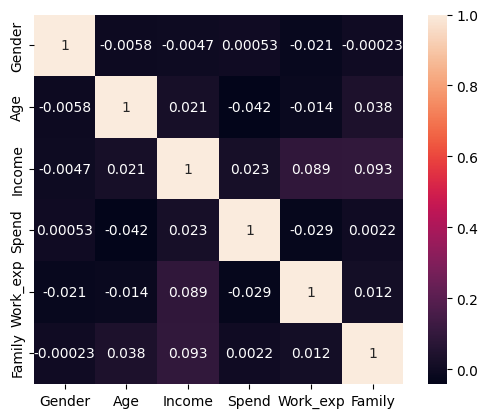

In [16]:
correlation_matrix = data.corr()
sn.heatmap(data = correlation_matrix, annot=True, square=True)
plt.show()

## Standardising data

In [17]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
scaled_data

array([[-1.20706357, -1.05408932, -2.09350095, -0.42833854, -0.79120713,
         0.11749744],
       [-1.20706357, -0.98372287, -1.65613312,  1.07554599, -0.28116224,
        -0.39005088],
       [ 0.82845678, -1.0189061 , -0.54084515, -1.6099621 , -0.79120713,
        -1.40514752],
       ...,
       [-1.20706357,  1.33836975, -0.43235606, -1.3235079 ,  1.24897242,
        -0.8975992 ],
       [-1.20706357,  0.98653753,  1.56090408, -1.68157565,  0.73892753,
        -0.8975992 ],
       [-1.20706357,  1.44391941, -0.00266404,  0.03714953,  0.22888264,
        -0.8975992 ]])

## Initiating modelling

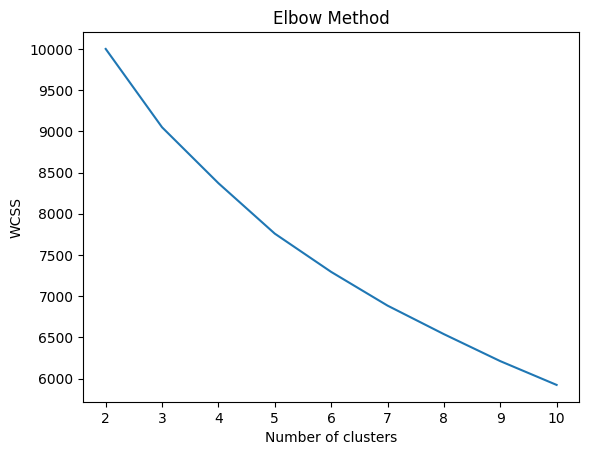

In [18]:
wcss = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i,random_state=0, n_init=10)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

plt.plot(range(2, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Loading and training the model

In [19]:
clusters_new = KMeans(3, random_state=10, n_init=10)
clusters_new.fit(scaled_data)

KMeans(n_clusters=3, n_init=10, random_state=10)

In [20]:
data['Clusters'] = clusters_new.labels_

In [21]:
data["Clusters"].value_counts()

Clusters
2    814
1    628
0    558
Name: count, dtype: int64

## Visualisation and generating inference

In [22]:
# sn.pairplot(data, hue='Clusters', palette='Set1', corner=True)
# plt.show()

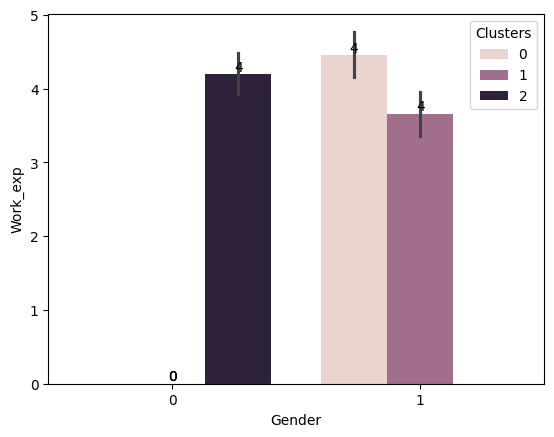

In [23]:
bar = sn.barplot(data, x='Gender', y='Work_exp', hue='Clusters')
for p in bar.patches:
    bar.annotate(format(p.get_height(), '.0f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 5),
                   textcoords = 'offset points')

In [24]:
data_all['Clusters'] = data['Clusters']

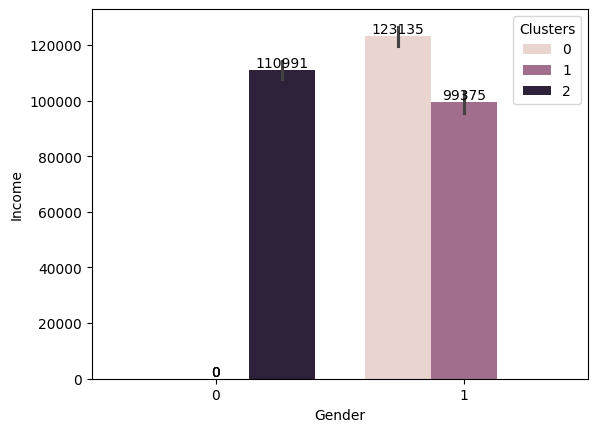

In [25]:
bar = sn.barplot(data, x='Gender', y='Income', hue='Clusters')
for p in bar.patches:
    bar.annotate(format(p.get_height(), '.0f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 5),
                   textcoords = 'offset points')

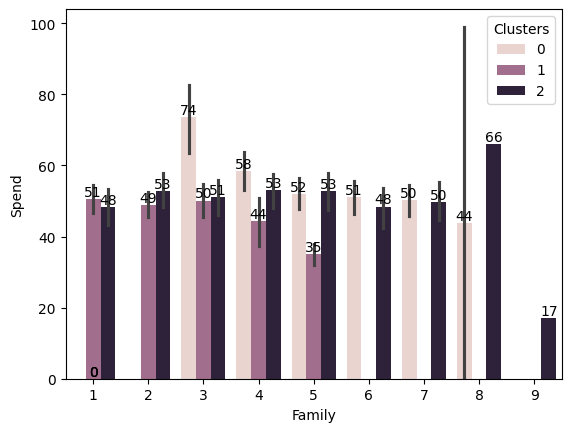

In [26]:
bar = sn.barplot(data, x='Family', y='Spend', hue='Clusters')
for p in bar.patches:
    bar.annotate(format(p.get_height(), '.0f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 5),
                   textcoords = 'offset points')

In [27]:
data

,Gender,Age,Income,Spend,Work_exp,Family,Clusters
0,0,19,15000,39,1,4,2
1,0,21,35000,81,3,3,2
2,1,20,86000,6,1,1,1
3,1,23,59000,77,0,2,1
4,1,31,38000,40,2,6,0
...,...,...,...,...,...,...,...
1995,1,71,184387,40,8,7,0
1996,1,91,73158,32,7,7,0
1997,0,87,90961,14,9,2,2
1998,0,77,182109,4,7,2,2


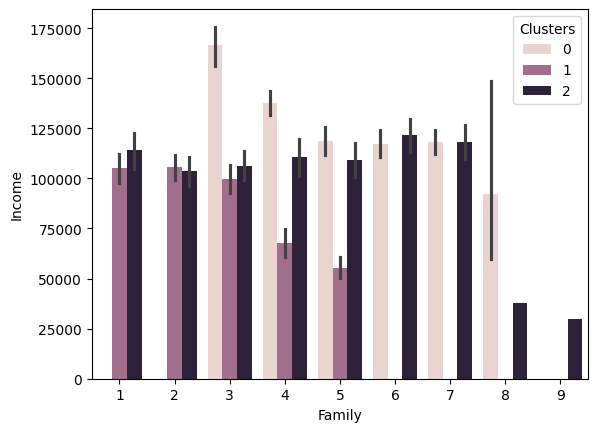

In [28]:
_bar = sn.barplot(data, x='Family', y='Income', hue='Clusters')
for p in bar.patches:
    bar.annotate(format(p.get_height(), '.0f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 5),
                   textcoords = 'offset points')

In [29]:
age_bins = [10, 20, 30, 40, 50, 60, 70, 80, 90]  # Define age bins
age_labels = ['0-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89']  # Define age labels

# Create a new column for age ranges
data['Age_range'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels, right=False)

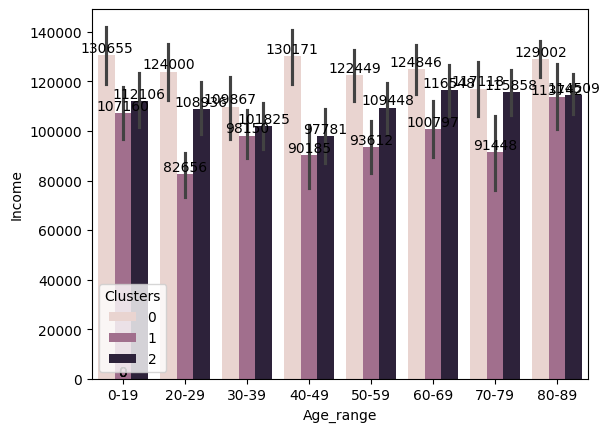

In [30]:
bar = sn.barplot(data, x='Age_range', y='Income', hue='Clusters')
for p in bar.patches:
    bar.annotate(format(p.get_height(), '.0f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 5),
                   textcoords = 'offset points')

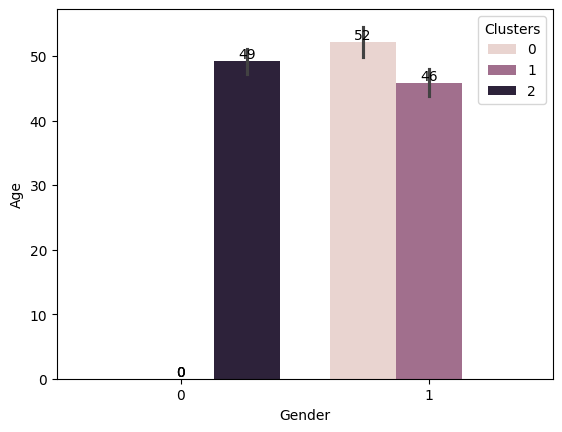

In [31]:
bar = sn.barplot(data, x='Gender', y='Age', hue='Clusters')
for p in bar.patches:
    bar.annotate(format(p.get_height(), '.0f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 5),
                   textcoords = 'offset points')

In [32]:
data

,Gender,Age,Income,Spend,Work_exp,Family,Clusters,Age_range
0,0,19,15000,39,1,4,2,0-19
1,0,21,35000,81,3,3,2,20-29
2,1,20,86000,6,1,1,1,20-29
3,1,23,59000,77,0,2,1,20-29
4,1,31,38000,40,2,6,0,30-39
...,...,...,...,...,...,...,...,...
1995,1,71,184387,40,8,7,0,70-79
1996,1,91,73158,32,7,7,0,NaN
1997,0,87,90961,14,9,2,2,80-89
1998,0,77,182109,4,7,2,2,70-79


In [33]:
input_x = scaled_data
output_y = data.iloc[:,-2].values

In [34]:
input_x

array([[-1.20706357, -1.05408932, -2.09350095, -0.42833854, -0.79120713,
         0.11749744],
       [-1.20706357, -0.98372287, -1.65613312,  1.07554599, -0.28116224,
        -0.39005088],
       [ 0.82845678, -1.0189061 , -0.54084515, -1.6099621 , -0.79120713,
        -1.40514752],
       ...,
       [-1.20706357,  1.33836975, -0.43235606, -1.3235079 ,  1.24897242,
        -0.8975992 ],
       [-1.20706357,  0.98653753,  1.56090408, -1.68157565,  0.73892753,
        -0.8975992 ],
       [-1.20706357,  1.44391941, -0.00266404,  0.03714953,  0.22888264,
        -0.8975992 ]])

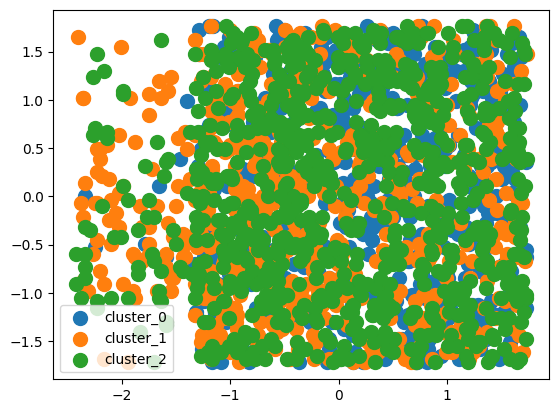

In [35]:
plt.scatter(input_x[output_y==0,2],input_x[output_y==0,1],s=100, label='cluster_0')
plt.scatter(input_x[output_y==1,2],input_x[output_y==1,1],s=100, label='cluster_1')
plt.scatter(input_x[output_y==2,2],input_x[output_y==2,1],s=100, label='cluster_2')
plt.legend()
plt.show()

<Axes: xlabel='Income', ylabel='Count'>

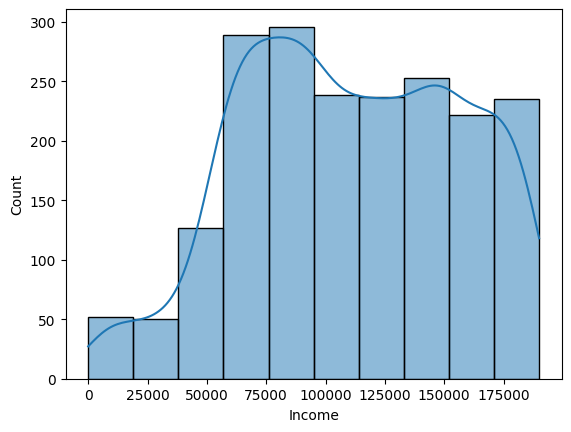

In [36]:
sn.histplot(data['Income'],bins=10,kde=True)

In [37]:
data.columns

Index(['Gender', 'Age', 'Income', 'Spend', 'Work_exp', 'Family', 'Clusters',
       'Age_range'],
      dtype='object')

<ipython-input-38-d4e657e03619>:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(5,5))
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)


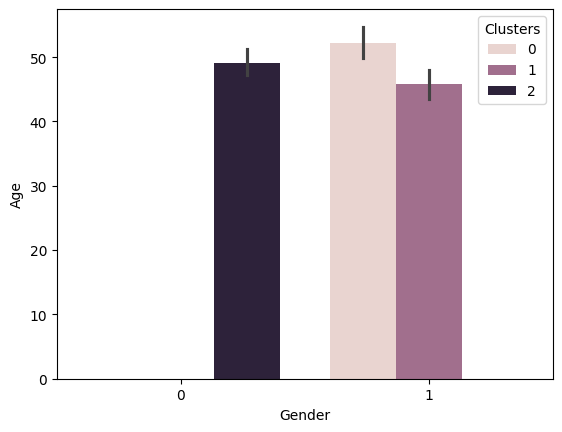

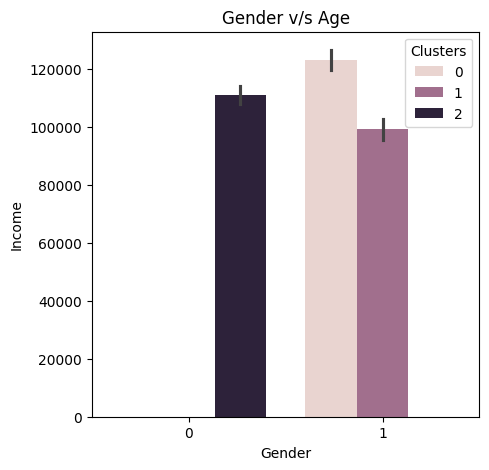

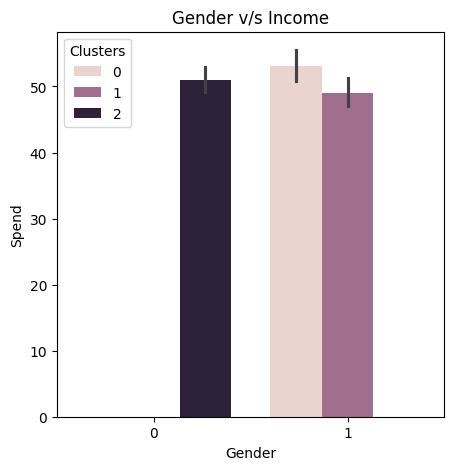

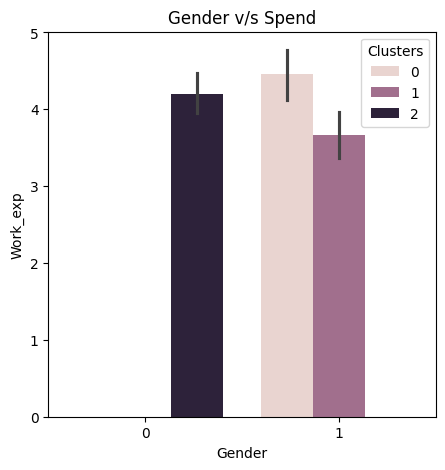

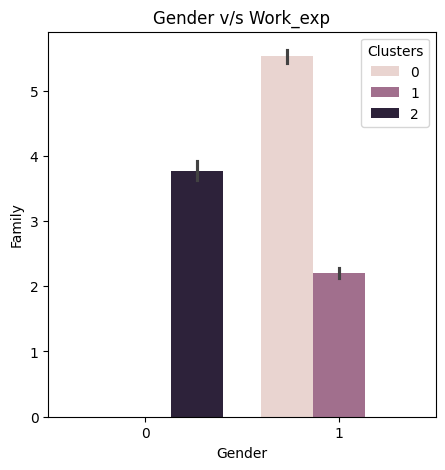

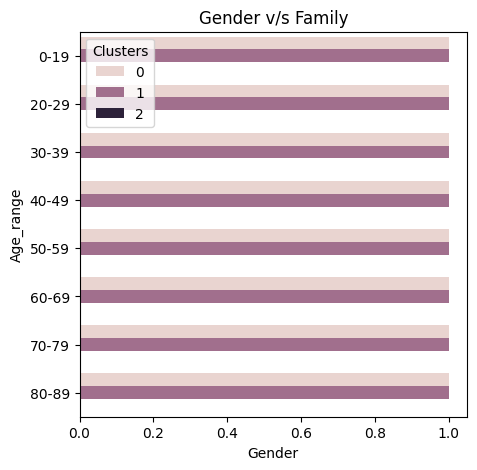

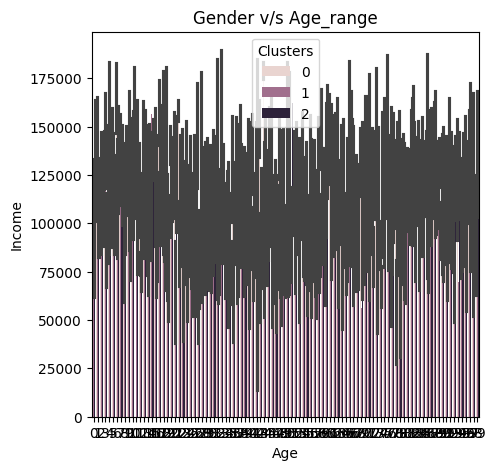

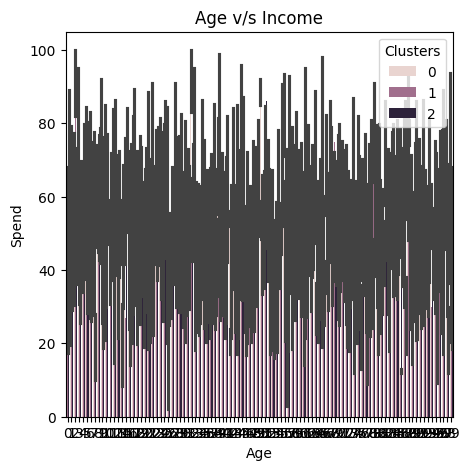

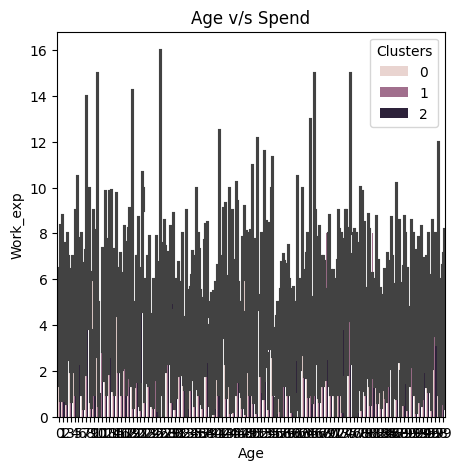

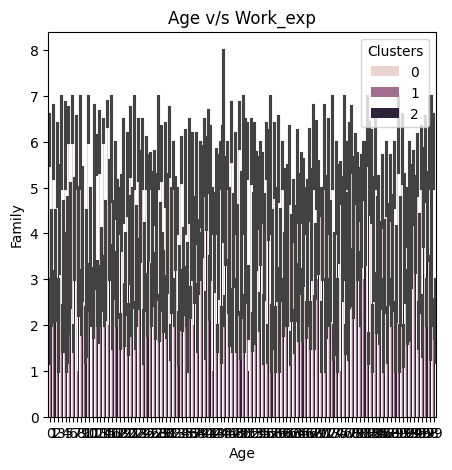

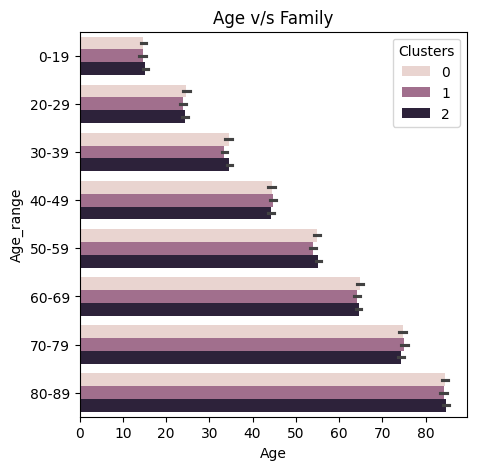

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


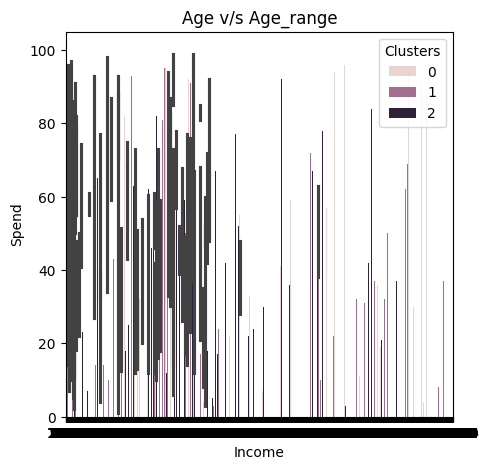

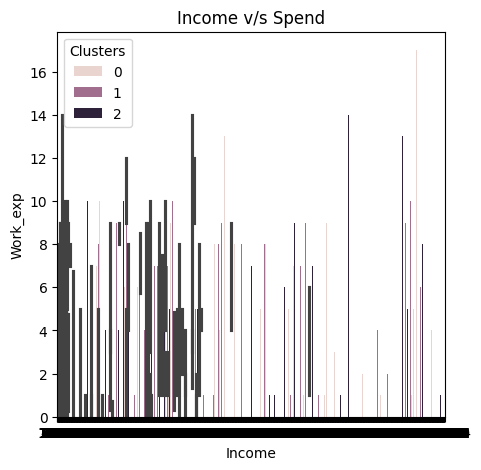

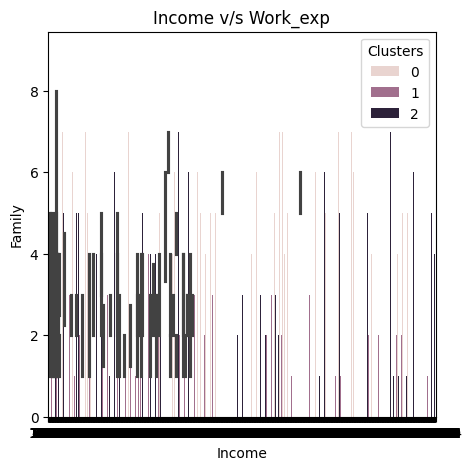

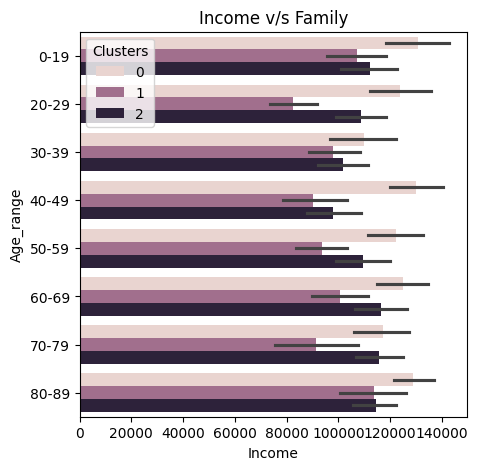

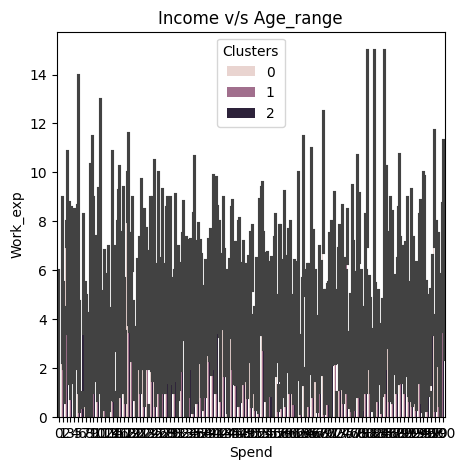

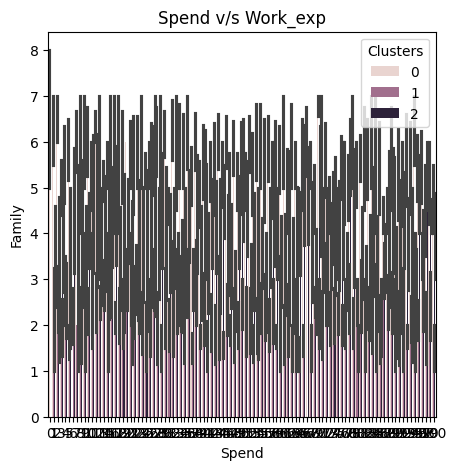

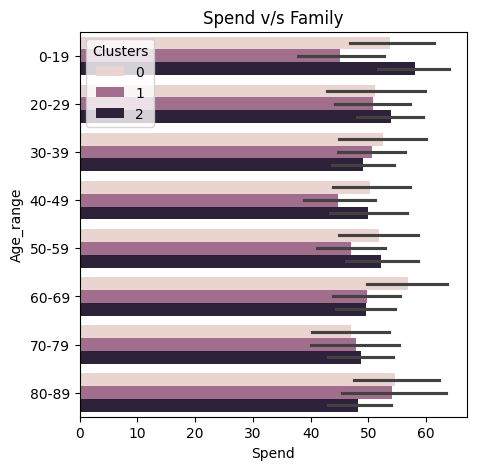

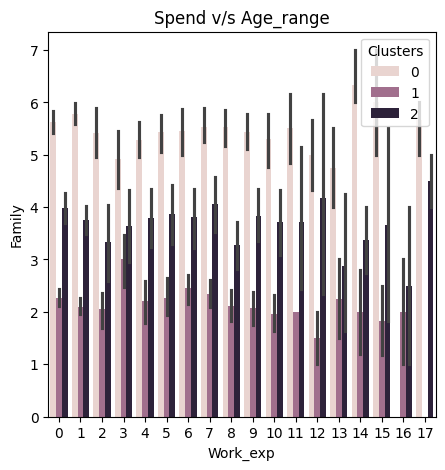

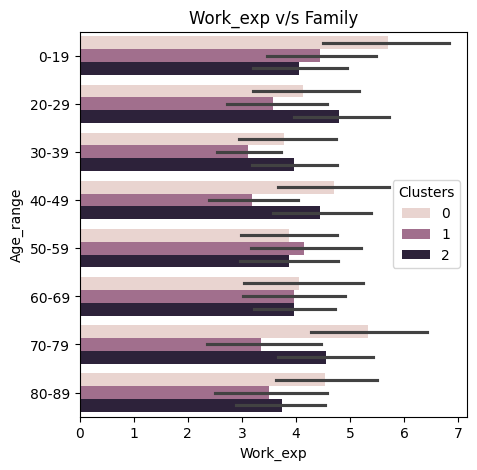

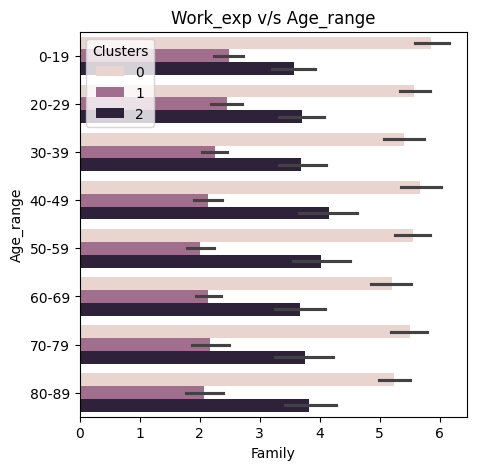

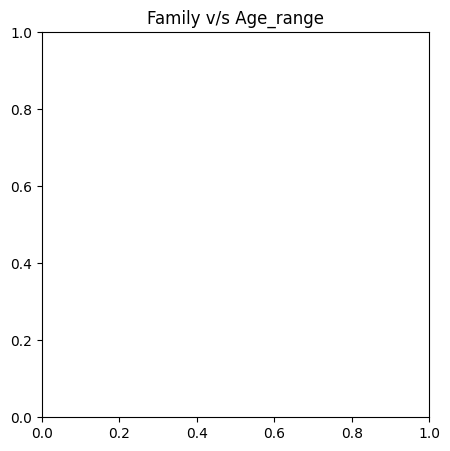

In [38]:
# columns = ['Gender', 'Age', 'Income', 'Spend', 'Work_exp', 'Family', 'Age_range']
# for ind, i in enumerate(columns):
#   for j in columns[ind:]:
#     if not i == j:
#       sn.barplot(data, x=i, y=j, hue='Clusters')
#       plt.figure(figsize=(5,5))
#       plt.title(i + " v/s " + j)

In [55]:
print(data.iloc[:,:-1].groupby('Clusters').mean())
print(data.iloc[:,:-1].groupby('Clusters').max())
print(data.iloc[:,:-1].groupby('Clusters').min())
print(data.iloc[:,:-1].groupby('Clusters').median())
print(data.iloc[:,:-1].groupby('Clusters').std())

          Gender        Age         Income      Spend  Work_exp    Family
Clusters                                                                 
0            1.0  52.222222  123135.231183  53.129032  4.456989  5.526882
1            1.0  45.802548   99374.597134  49.060510  3.660828  2.205414
2            0.0  49.159705  110991.323096  50.944717  4.200246  3.769042
          Gender  Age  Income  Spend  Work_exp  Family
Clusters                                              
0              1   99  189689    100        17       8
1              1   99  189974    100        16       5
2              0   99  189945    100        17       9
          Gender  Age  Income  Spend  Work_exp  Family
Clusters                                              
0              1    0    4000      0         0       3
1              1    0    1000      1         0       1
2              0    0       0      1         0       1
          Gender   Age    Income  Spend  Work_exp  Family
Clusters              

## Summary

1. The elbow method shows optimum no of clusters as 3.
2. The clustering is dependent on the following factors:

    1. Cluster 0

        Bigger family size
        
        More work exp in lower and higher age
        
        Predominantly female with more family members
        
        Average age of females over 50
        
        Income about 120k with most spend

    2. Cluster 1

        Smaller family

        Less work exp

        Predominantly female with less family members

        income about 110k

    3. Cluster 2

        Mid size family

        More work exp in middle age

        Predominantly male with avg family members

        income about 100k